In [36]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [37]:
an_full = prepare_data("data_npy/158_dd.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/158.npy", 0, 0, chop=False)

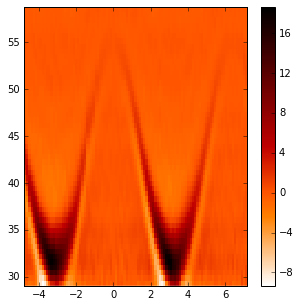

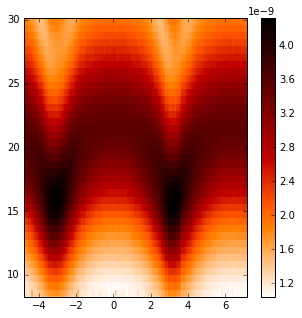

In [39]:
an = prepare_data("data_npy/158_dd.npy", 22, 75)
lc = prepare_data("data_npy/158.npy", 6, 45)
calibration_phase_axis(an, lc, 0, 5, 30, 45, plot=False)
plot_datascan(an)
plot_datascan(lc)

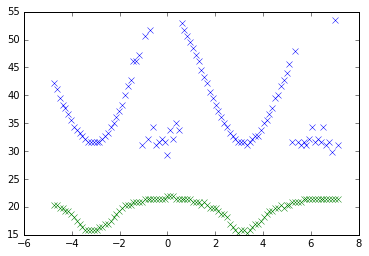

In [40]:
lc_line = peak_positions(lc)
abs_line = peak_positions(an)
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(an['y'], abs_line, 'x')
plt.plot(lc['y'], lc_line, 'x')

In [41]:
# These spurious points are removed manually; then we zip phi and V coordinates together
lc_line = zip(lc['y'], lc_line)
abs_line = zip(np.concatenate((an['y'][:31], an['y'][48:84])),
               np.concatenate((abs_line[0:31], abs_line[48:84])))

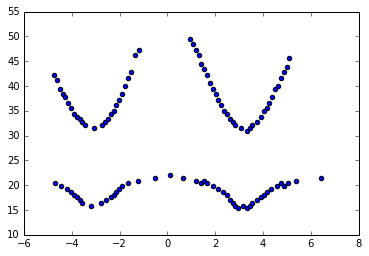

In [42]:
lines = merge_points([lc_line, abs_line])
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Fit with one free parameter

In [66]:
%%capture
p0 = [0.9]
fit_1 = fit_abs_model(lines, 48, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [67]:
fit_1['popt']

array([ 0.87146749])

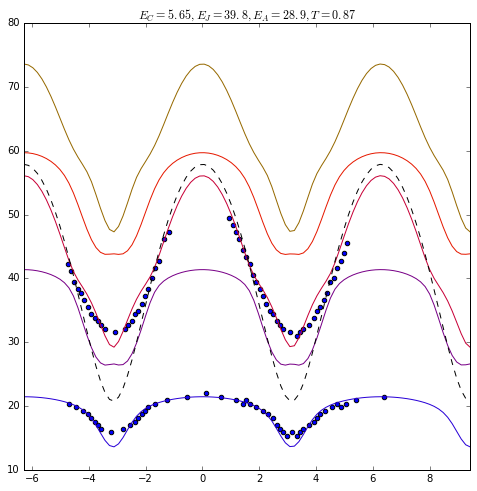

In [68]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, Ea=28.95)

## Fit with two free parameters

In [69]:
%%capture
p0 = [28, 0.9]
fit_2 = fit_abs_model(lines, 48, p0, Ej=39.8, Ec=5.65)

In [70]:
fit_2['popt']

array([ 27.38708641,   0.82406222])

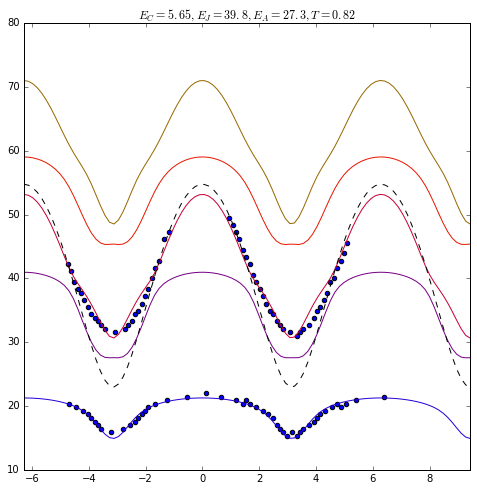

In [71]:
plot_fit_results(fit_2, lines, Ej=39.8, Ec=5.65)

## Fit with three free parameters

In [72]:
%%capture
p0 = [5, 27, 0.9]
fit_3 = fit_abs_model(lines, 48, p0, Ej=39.8)

In [73]:
fit_3['popt']

array([  5.34556765,  27.34041883,   0.80576788])

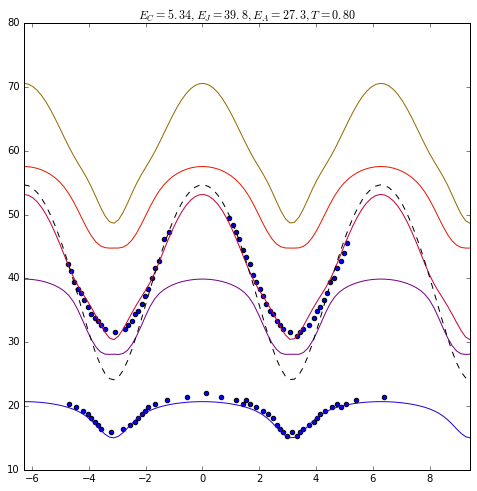

In [75]:
plot_fit_results(fit_3, lines, Ej=39.8)

## Fit with four free parameters

In [77]:
%%capture
p0 = [5, 40, 27, 0.9]
fit_4 = fit_abs_model(lines, 48, p0, max_tol=2e-6)

In [78]:
fit_4['popt']

array([  5.16934189,  40.83589574,  27.38886673,   0.80913634])

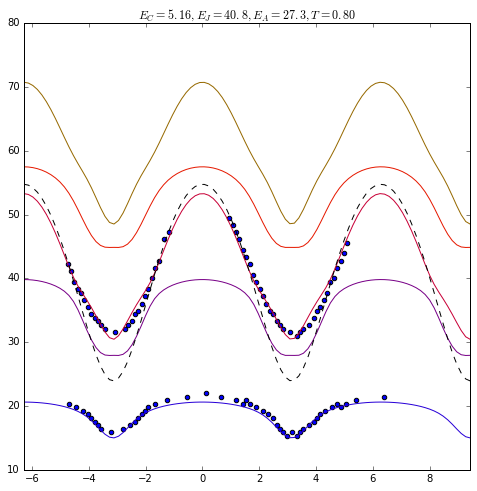

In [79]:
plot_fit_results(fit_4, lines)